In [ ]:
## Importing related libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('values.csv')
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [3]:
df1=pd.read_csv('labels.csv')
df1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


Checking the loaded data

In [4]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [ ]:
df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [7]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [8]:
# rename the column names for better understanding

df=df.rename(columns={'patient_id':'patient_id','slope_of_peak_exercise_st_segment': 'peak_exercise', 'thal':'thal',
       'resting_blood_pressure':'resting_bp', 'chest_pain_type':'chest_pain_type', 'num_major_vessels':'major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl':'fasting_bs', 'resting_ekg_results':'resting_ekg',
       'serum_cholesterol_mg_per_dl':'serum_cholesterol', 'oldpeak_eq_st_depression':'oldpeak_depression', 'sex':'sex', 'age':'age',
       'max_heart_rate_achieved':'max_heart', 'exercise_induced_angina':'exercise'})



In [9]:
df

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [10]:
# join values and label dataset for training the model

df3 = pd.merge(df, df1, on='patient_id', how='left')  
df3

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


As we can see in the above data, some columns are contionous and some of them are categorical. So we need to categorize the data.

EDA

Univarite analysis
For Continuous Data

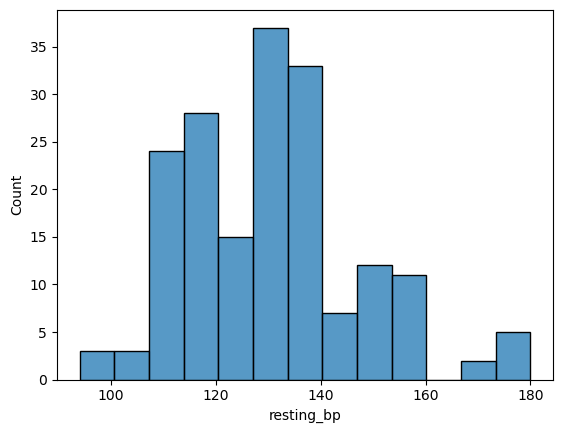

In [11]:
sns.histplot(x=df.resting_bp)
plt.show()

Insights = Most individuals likely fall within the range of 120 to 140 , indicating a common resting BP

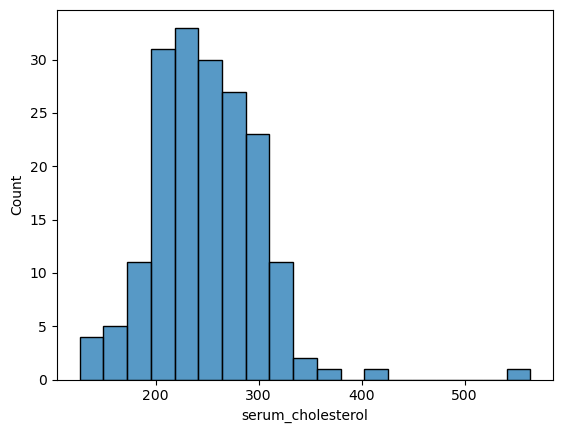

In [12]:
sns.histplot(x=df.serum_cholesterol)
plt.show()

Insights = The majority of individuals have serum cholesterol level within 200 to 300 but there are smaller number of individuals who exhibit significantly higher serum cholesterol level

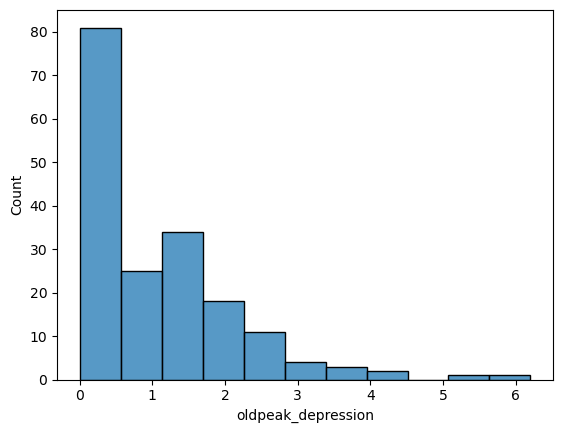

In [13]:
sns.histplot(x=df.oldpeak_depression)
plt.show()

insights = majority of individuals have oldpeak depression values within a specific range, but there are a smaller number of individuals who exhibit significantly higher oldpeak depression.

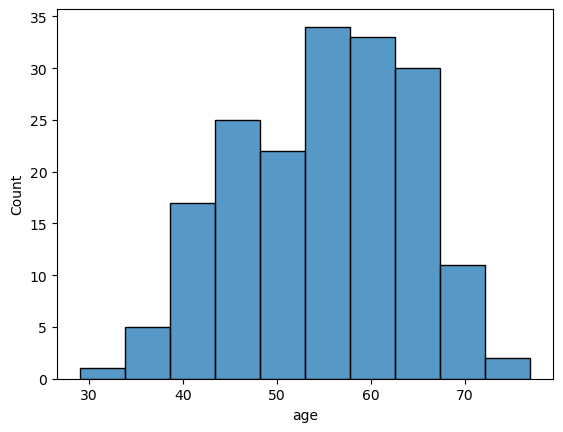

In [14]:
sns.histplot(x=df.age)
plt.show()

Insights = number of individuals of age group 45 to 67 are more

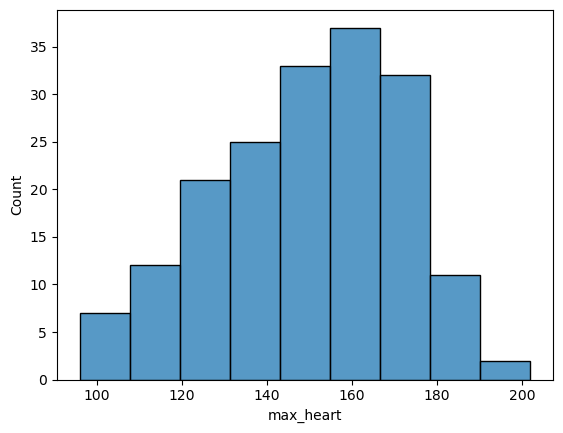

In [15]:
sns.histplot(x=df.max_heart)
plt.show()

Insights = majority of individuals are having the heart rate is between 140 to 180

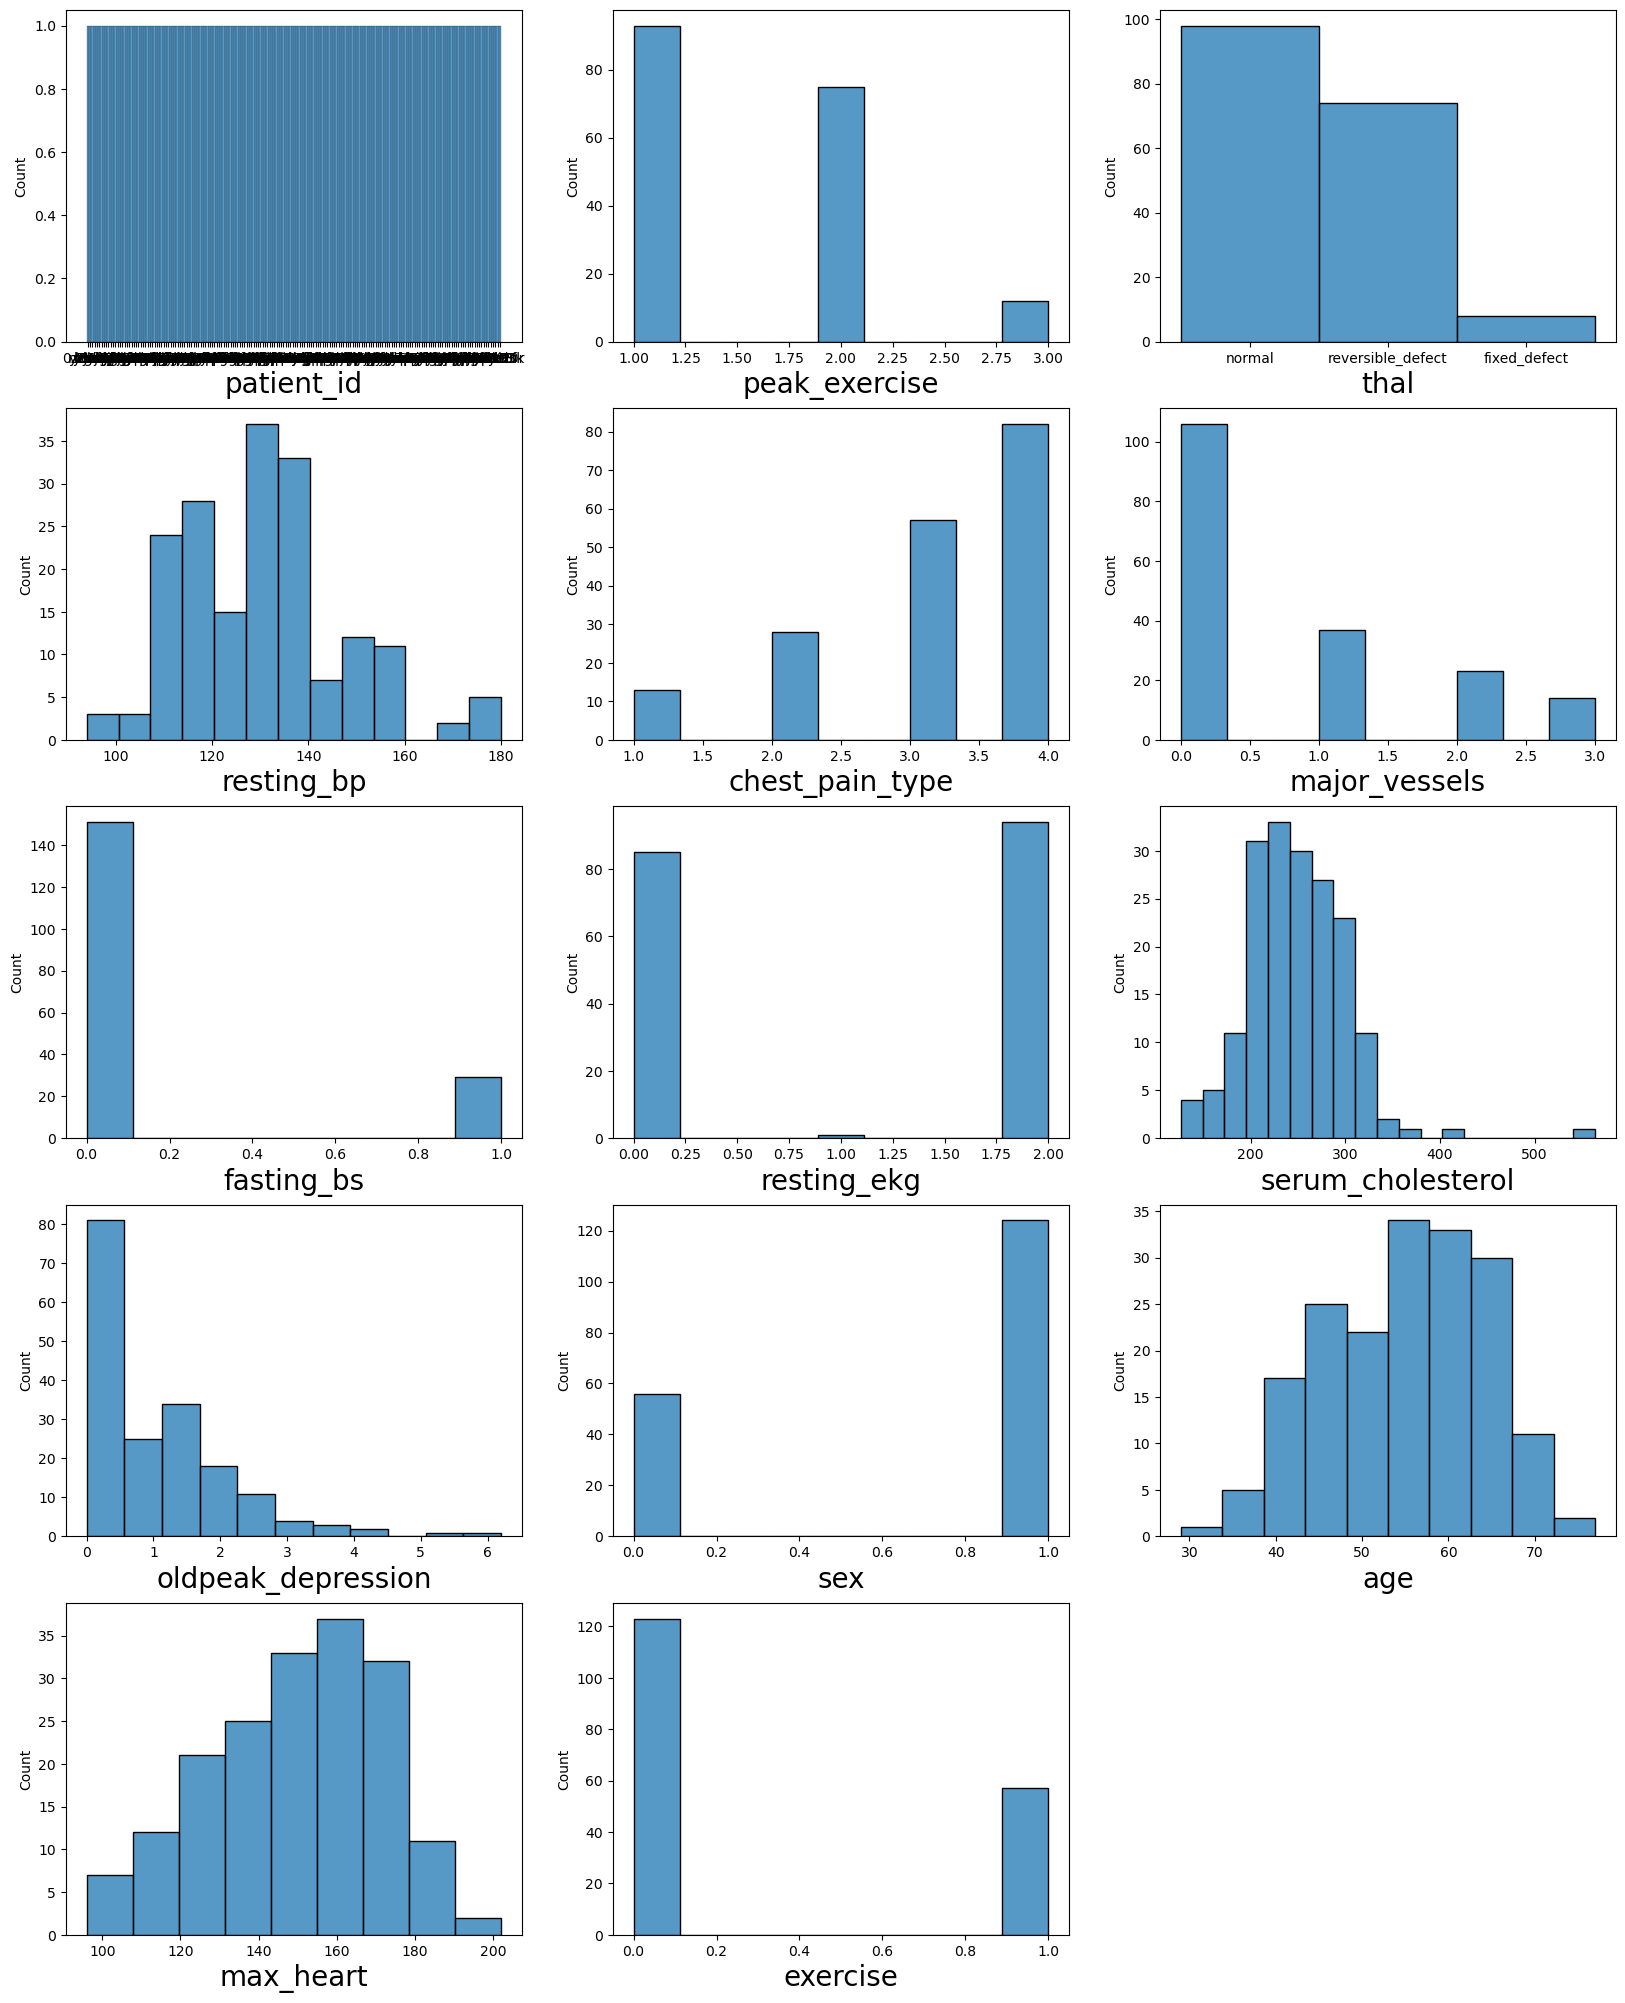

In [16]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=15 :     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=df[column]) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

## Univarite analysis
For Categorical Data


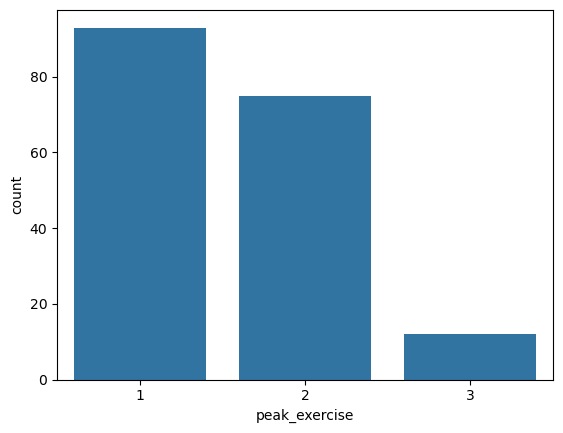

In [17]:
sns.countplot(x=df.peak_exercise)
plt.show()

Insight = Most individuals likely fall within the range of 1.00 to 2.00 , indicating a common peak exercise

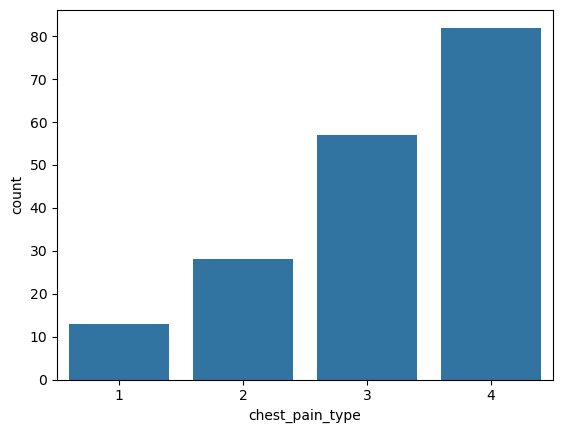

In [18]:
sns.countplot(x=df.chest_pain_type)
plt.show()

Insight = Chest pain type 4 appears to be the most common with the highest count . Chest pain types 1,2 and 3 have relatively lower counts , suggested that they are less frequent in dataset

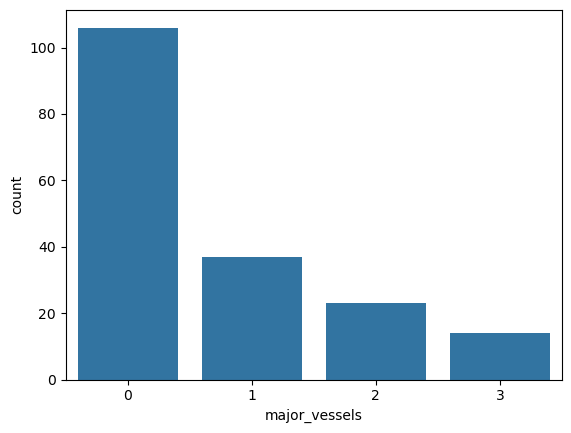

In [19]:
sns.countplot(x=df.major_vessels)
plt.show()

Insights = The majority of individuals have no major vessels affected , indicating that this is the most common scenario

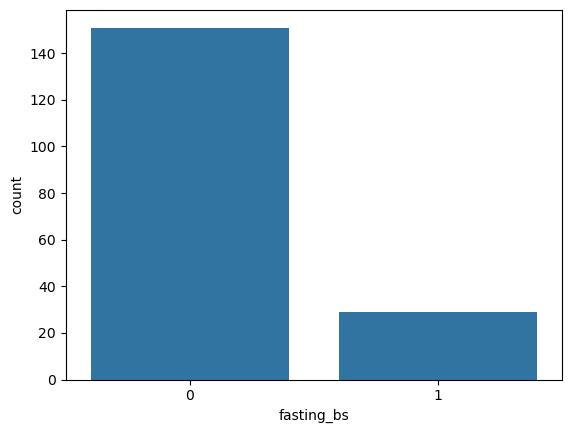

In [20]:
sns.countplot(x=df.fasting_bs)
plt.show()

Insights = it appears to be bimodal with two distinct peaks , one with lower FBS level and another with higher FBS level

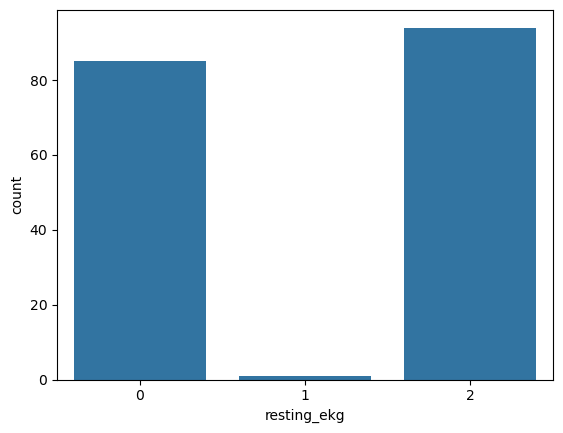

In [21]:
sns.countplot(x=df.resting_ekg)
plt.show()

Insights = The majority of individuals likely fall within the lower resting EKG range, indicating a normal or near normal EKG

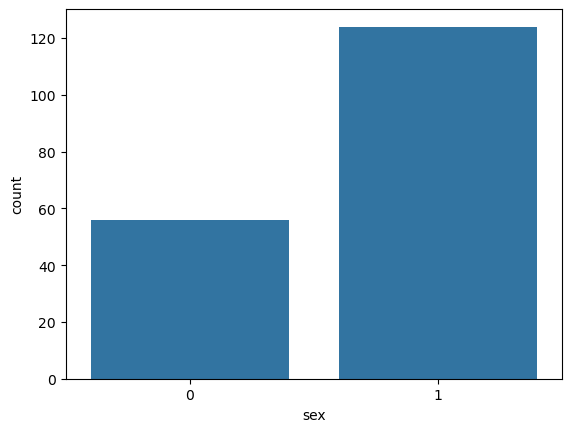

In [22]:
sns.countplot(x=df.sex)
plt.show()

Insights = majority of individuals are male as compare to female

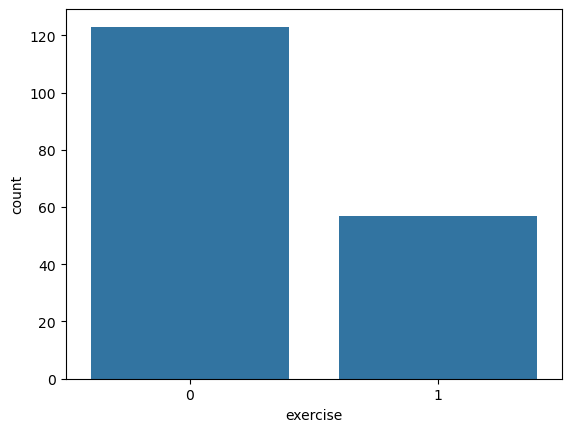

In [23]:
sns.countplot(x=df.exercise)
plt.show()

Insights = majority of individuals are male as compare to female

## Bivatite analysis
<span style='color:red'> Continous data :</span>


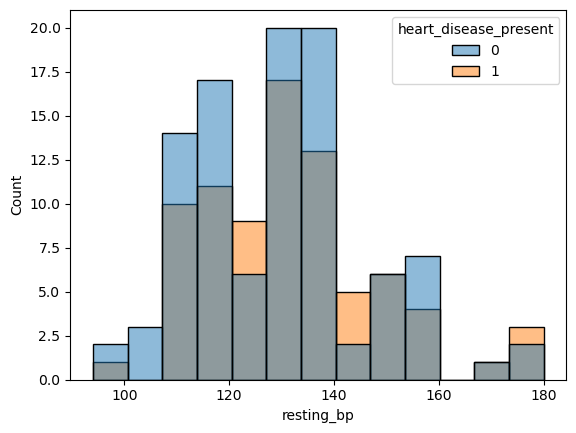

In [24]:
sns.histplot(x=df.resting_bp, hue=df1.heart_disease_present)
plt.show()

Insights = As the resting blood pressure range exceeds the of approximately 0.35 % the chances of having a Heart disease increases

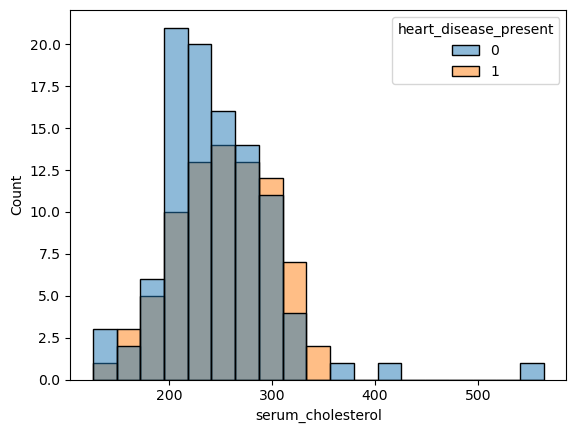

In [25]:
sns.histplot(x=df.serum_cholesterol, hue=df1.heart_disease_present)
plt.show()

Insights =if your serum_cholestrol is in between the range of 0.25 to 0.6 then you won't have a Heart disease

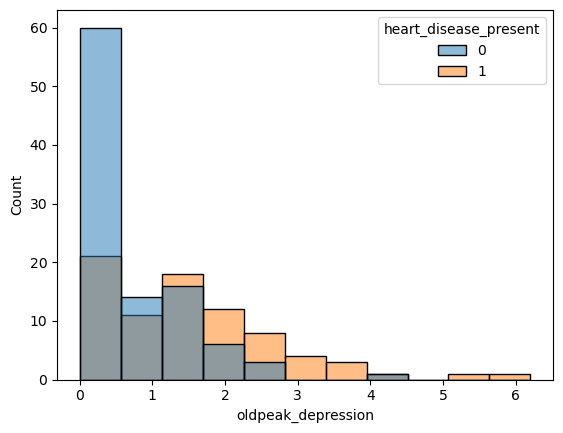

In [26]:
sns.histplot(x=df.oldpeak_depression, hue=df1.heart_disease_present)
plt.show()

Insights = As the oldpeak_depression count increases the chances of getting a Heart Disease also increases rapidly

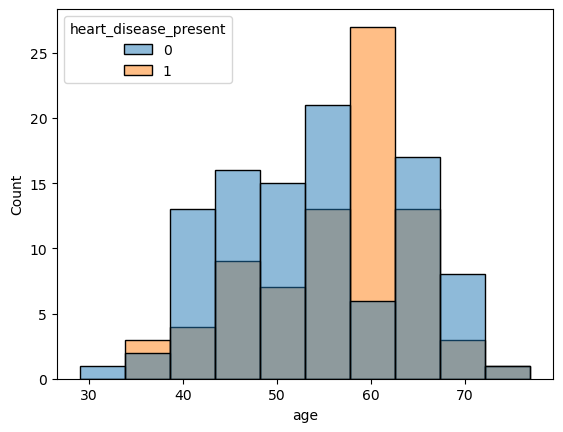

In [27]:
sns.histplot(x=df.age, hue=df1.heart_disease_present)
plt.show()

Insights = number of individuals of age group 60 to 70 are more likely to have a Heart Disease

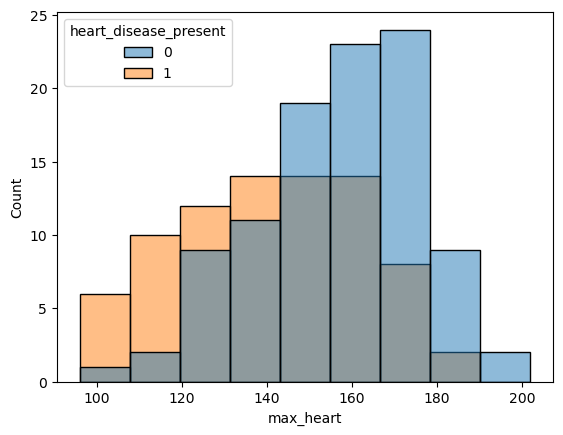

In [28]:
sns.histplot(x=df.max_heart, hue=df1.heart_disease_present)
plt.show()

Insights = majority of individuals are having the heart rate less than 0.4 have heart disease present

## Bivatite analysis
<span style='color:red'> Categorical data :</span>


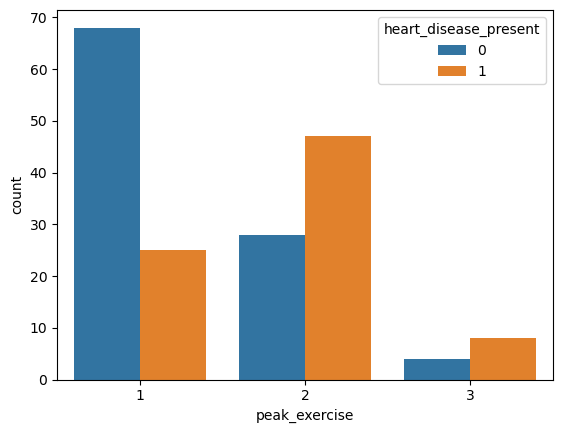

In [29]:
sns.countplot(x=df.peak_exercise, hue=df1.heart_disease_present)
plt.show()

Insights - Patients with a slope of 2 during peak exercise are less likely to have heart disease compared to those with slopes of 1 or 3.

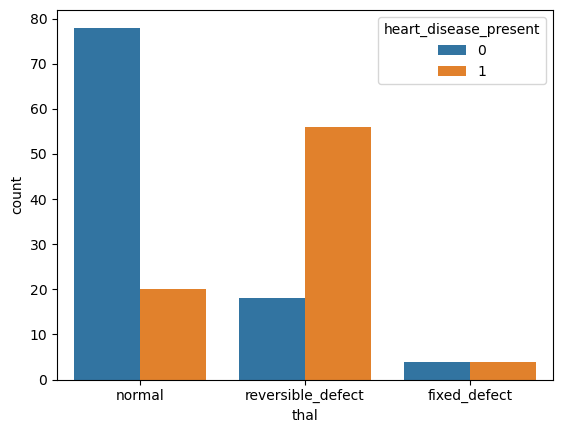

In [30]:
sns.countplot(x=df.thal, hue=df1.heart_disease_present)
plt.show()

Insights = Individuals with a reversible defect in thalassemia status exhibit a higher incidence of heart disease compared to those with normal thalassemia.

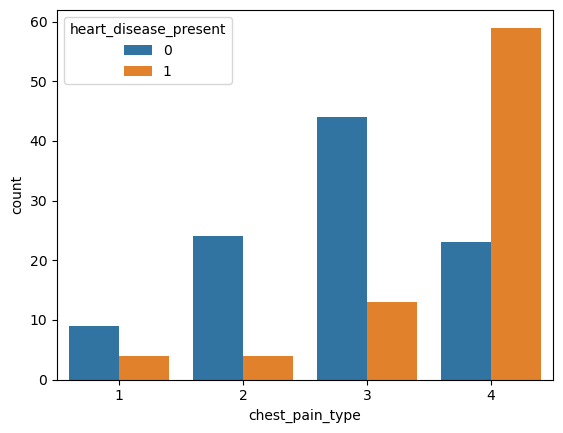

In [31]:
sns.countplot(x=df.chest_pain_type, hue=df1.heart_disease_present)
plt.show()

Insights = Certain chest pain types, such as type 3, are more prevalent among patients with heart disease.

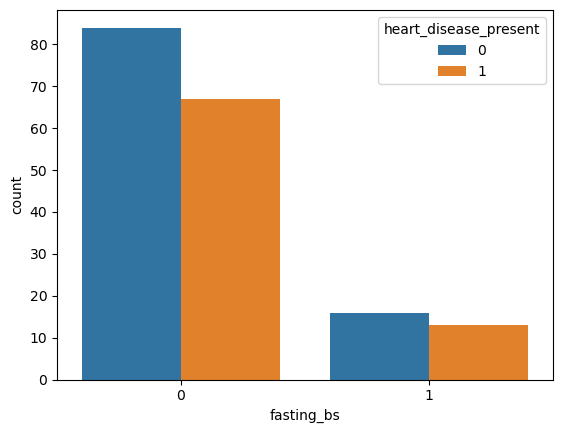

In [32]:
sns.countplot(x=df.fasting_bs, hue=df1.heart_disease_present)
plt.show()

Insights = Patients with fasting blood sugar levels above 120 mg/dl show a higher risk of heart disease.

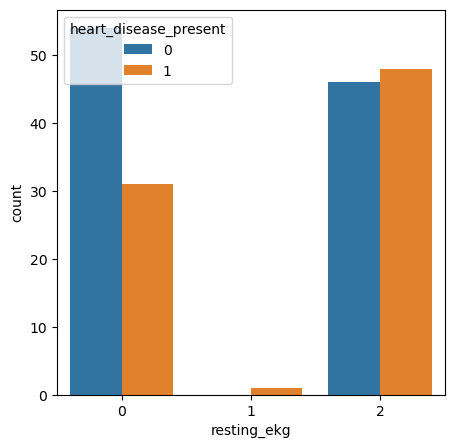

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x=df.resting_ekg, hue=df1.heart_disease_present)
plt.show()

Insights = Patients with resting EKG results of type 0 are more likely to be heart disease-free, while type 2 results show a more balanced distribution of heart disease presence.


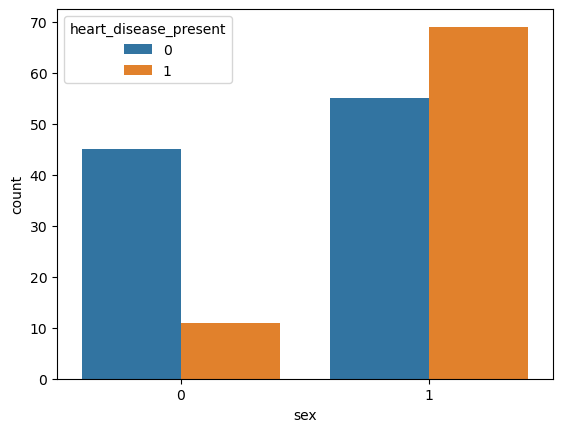

In [34]:
sns.countplot(x=df.sex, hue=df1.heart_disease_present)
plt.show()

Insights = Male patients are more likely to have heart disease compared to female patients.

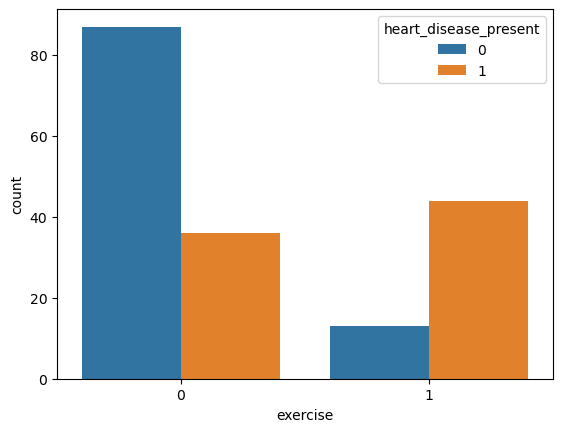

In [35]:
sns.countplot(x=df.exercise, hue=df1.heart_disease_present)
plt.show()

Insights = Presence of exercise-induced angina is strongly associated with the presence of heart disease.

## Data preprocessing
checking for outliers in the data

In [36]:
df3.isnull().sum()    # No Null values  #full merged data

patient_id               0
peak_exercise            0
thal                     0
resting_bp               0
chest_pain_type          0
major_vessels            0
fasting_bs               0
resting_ekg              0
serum_cholesterol        0
oldpeak_depression       0
sex                      0
age                      0
max_heart                0
exercise                 0
heart_disease_present    0
dtype: int64

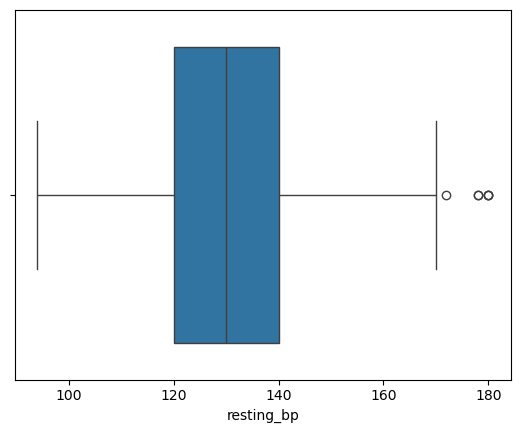

In [37]:
sns.boxplot(x=df3.resting_bp)
plt.show()

# resting_bp column has outliers

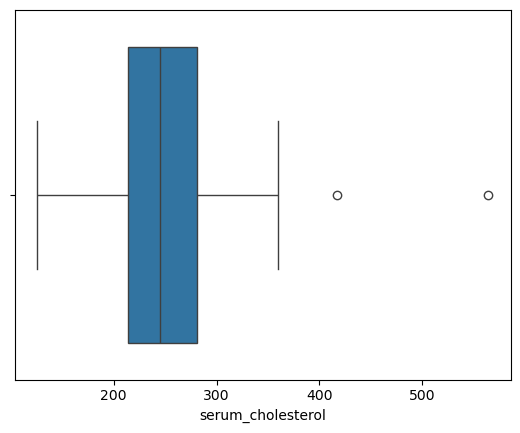

In [38]:
sns.boxplot(x=df3.serum_cholesterol)
plt.show()

# serum_cholesterol column has outliers

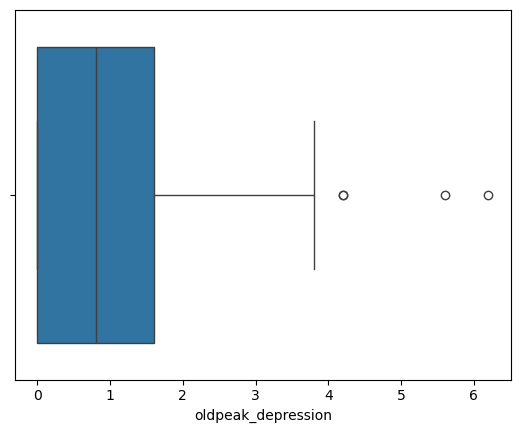

In [39]:
sns.boxplot(x=df3.oldpeak_depression)
plt.show()

# oldpeak_depression column has outliers

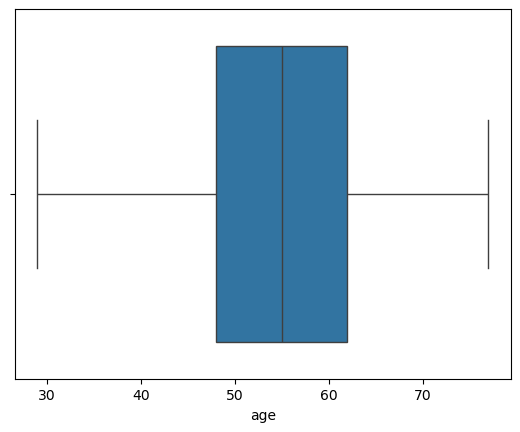

In [40]:
sns.boxplot(x=df3.age)
plt.show()  ## There are no outliers in age column

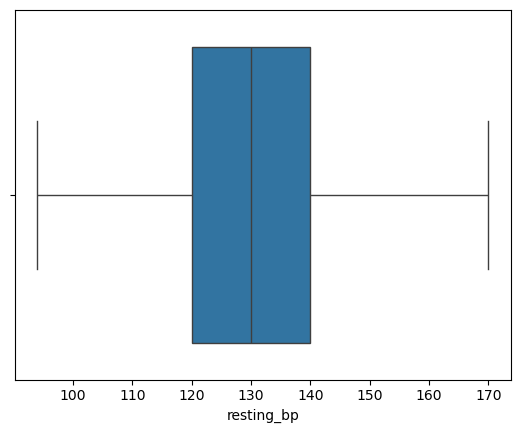

In [41]:
# Handling the outliers

df3.loc[df3.resting_bp > 170, 'resting_bp']=np.median(df3.resting_bp)
df3.loc[df3.serum_cholesterol >400, 'serum_cholesterol']=np.median(df3.serum_cholesterol)
df3.loc[df3.oldpeak_depression > 4 ,'oldpeak_depression']=np.median(df3.oldpeak_depression)
sns.boxplot(x=df3.resting_bp)
plt.show()

# outliers has been removed

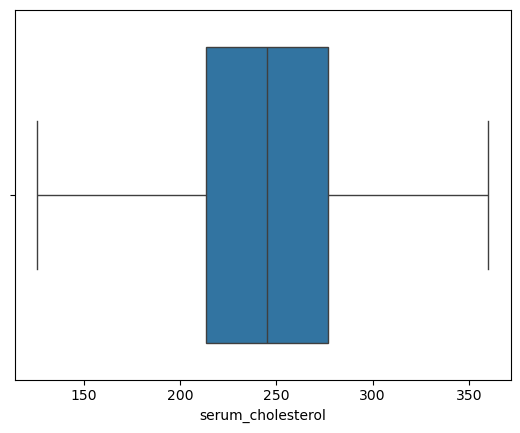

In [42]:
sns.boxplot(x=df3.serum_cholesterol)
plt.show()

# outliers has been removed

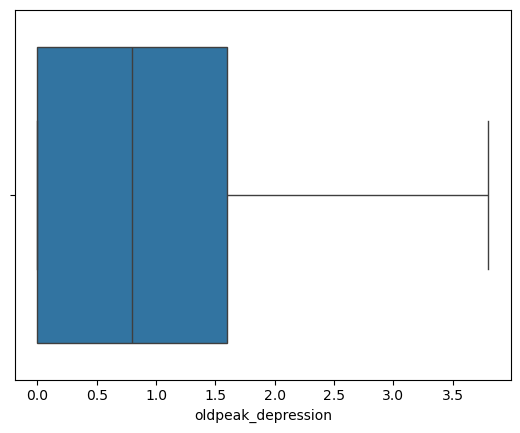

In [43]:
sns.boxplot(x=df3.oldpeak_depression)
plt.show()

# outliers has been removed

## Encoding
Encoding is the process of converting these categorical values into a numerical format that the algorithms can use

In [44]:
from sklearn.preprocessing import LabelEncoder  # Importing the LabelEncoder
le= LabelEncoder()  
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             180 non-null    object 
 1   peak_exercise          180 non-null    int64  
 2   thal                   180 non-null    object 
 3   resting_bp             180 non-null    int64  
 4   chest_pain_type        180 non-null    int64  
 5   major_vessels          180 non-null    int64  
 6   fasting_bs             180 non-null    int64  
 7   resting_ekg            180 non-null    int64  
 8   serum_cholesterol      180 non-null    float64
 9   oldpeak_depression     180 non-null    float64
 10  sex                    180 non-null    int64  
 11  age                    180 non-null    int64  
 12  max_heart              180 non-null    int64  
 13  exercise               180 non-null    int64  
 14  heart_disease_present  180 non-null    int64  
dtypes: flo

In [45]:
df3.head()

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,130,1,0,0,2,270.0,0.8,1,59,145,0,0


In [46]:
df3.thal=le.fit_transform(df.thal)    # encoding the thal column
df3.patient_id=le.fit_transform(df.patient_id)   # encoding the patient_id column
df3.head()

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
0,6,1,1,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,147,2,1,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,172,1,1,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,112,1,2,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,133,3,2,130,1,0,0,2,270.0,0.8,1,59,145,0,0


## Scaling the data
Scaling in machine learning is essential because it standardizes the range of independent variables or features, ensuring that all features contribute equally to the model

In [47]:
from sklearn.preprocessing import MinMaxScaler   # importing MinMaxScaler

In [48]:
ms = MinMaxScaler()

In [49]:
df3[['resting_bp','serum_cholesterol','max_heart','age']]=ms.fit_transform(df3[['resting_bp','serum_cholesterol','max_heart','age']])

In [50]:
df3.head()

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
0,6,1,1,0.447368,2,0,0,2,0.777778,0.0,1,0.333333,0.698113,0,0
1,147,2,1,0.210526,3,0,0,0,0.376068,1.6,0,0.520833,0.584906,0,0
2,172,1,1,0.407895,4,3,0,2,0.760684,0.0,1,1.000000,0.622642,1,1
3,112,1,2,0.763158,4,0,0,0,0.414530,0.0,1,0.229167,0.801887,0,1
4,133,3,2,0.473684,1,0,0,2,0.615385,0.8,1,0.625000,0.462264,0,0


In [51]:
df3.fasting_bs.unique()

array([0, 1], dtype=int64)

In [52]:
## finding the correalation of data
np.median(df3.fasting_bs)

0.0

## Feature selection

In [53]:
df3.drop('patient_id' , axis=1 )

# as we dont require patient_id column , drop patient_id column

,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
0,1,1,0.447368,2,0,0,2,0.777778,0.0,1,0.333333,0.698113,0,0
1,2,1,0.210526,3,0,0,0,0.376068,1.6,0,0.520833,0.584906,0,0
2,1,1,0.407895,4,3,0,2,0.760684,0.0,1,1.000000,0.622642,1,1
3,1,2,0.763158,4,0,0,0,0.414530,0.0,1,0.229167,0.801887,0,1
4,3,2,0.473684,1,0,0,2,0.615385,0.8,1,0.625000,0.462264,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,0.407895,4,2,1,0,0.547009,0.2,1,0.791667,0.632075,0,1
176,2,1,0.473684,4,0,0,1,0.858974,3.4,0,0.541667,0.198113,1,1
177,2,2,0.407895,3,0,0,0,0.782051,1.8,1,0.729167,0.330189,1,1
178,1,1,0.394737,3,2,1,0,0.551282,0.0,1,0.395833,0.745283,0,0


In [54]:
df3.corr()

#Correlation in feature selection is used to identify and eliminate redundant features, thereby improving the efficiency and
# performance of a machine learning model

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
patient_id,1.000000,-0.021570,0.046226,0.054130,0.054496,0.001383,0.044933,0.054588,-0.066896,-0.104404,0.058200,0.033113,0.036123,0.003103,-0.029908
peak_exercise,-0.021570,1.000000,0.154101,0.061536,0.121207,0.076832,0.050199,0.172191,-0.047307,0.535583,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.046226,0.154101,1.000000,-0.062529,0.269583,0.174107,-0.070225,-0.052171,0.023872,0.189707,0.265420,-0.007934,-0.142098,0.360395,0.447214
resting_bp,0.054130,0.061536,-0.062529,1.000000,-0.037038,0.090367,0.096842,0.113544,0.163281,0.110505,-0.016618,0.259479,-0.014901,0.056117,0.076048
chest_pain_type,0.054496,0.121207,0.269583,-0.037038,1.000000,0.249061,-0.088992,0.033379,0.081077,0.070715,0.086057,0.085001,-0.301792,0.346266,0.412829
major_vessels,0.001383,0.076832,0.174107,0.090367,0.249061,1.000000,0.169792,0.096656,0.135630,0.167406,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_bs,0.044933,0.050199,-0.070225,0.096842,-0.088992,0.169792,1.000000,0.053864,0.001109,-0.002458,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg,0.054588,0.172191,-0.052171,0.113544,0.033379,0.096656,0.053864,1.000000,0.141028,0.118666,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol,-0.066896,-0.047307,0.023872,0.163281,0.081077,0.135630,0.001109,0.141028,1.000000,-0.006879,-0.087374,0.200082,-0.108363,0.137476,0.146419
oldpeak_depression,-0.104404,0.535583,0.189707,0.110505,0.070715,0.167406,-0.002458,0.118666,-0.006879,1.000000,0.121071,0.202029,-0.324242,0.263756,0.388253


If the column has no variance (i.e., all values are 0 or all are 1), it won't contribute to any analysis or model, as it doesn't provide distinguishing information Given that this column isn't adding value and is showing NaN in correlation analysis, it's reasonable to remove it. Focus on other features that provide more predictive power or meaningful correlations.

<Axes: >

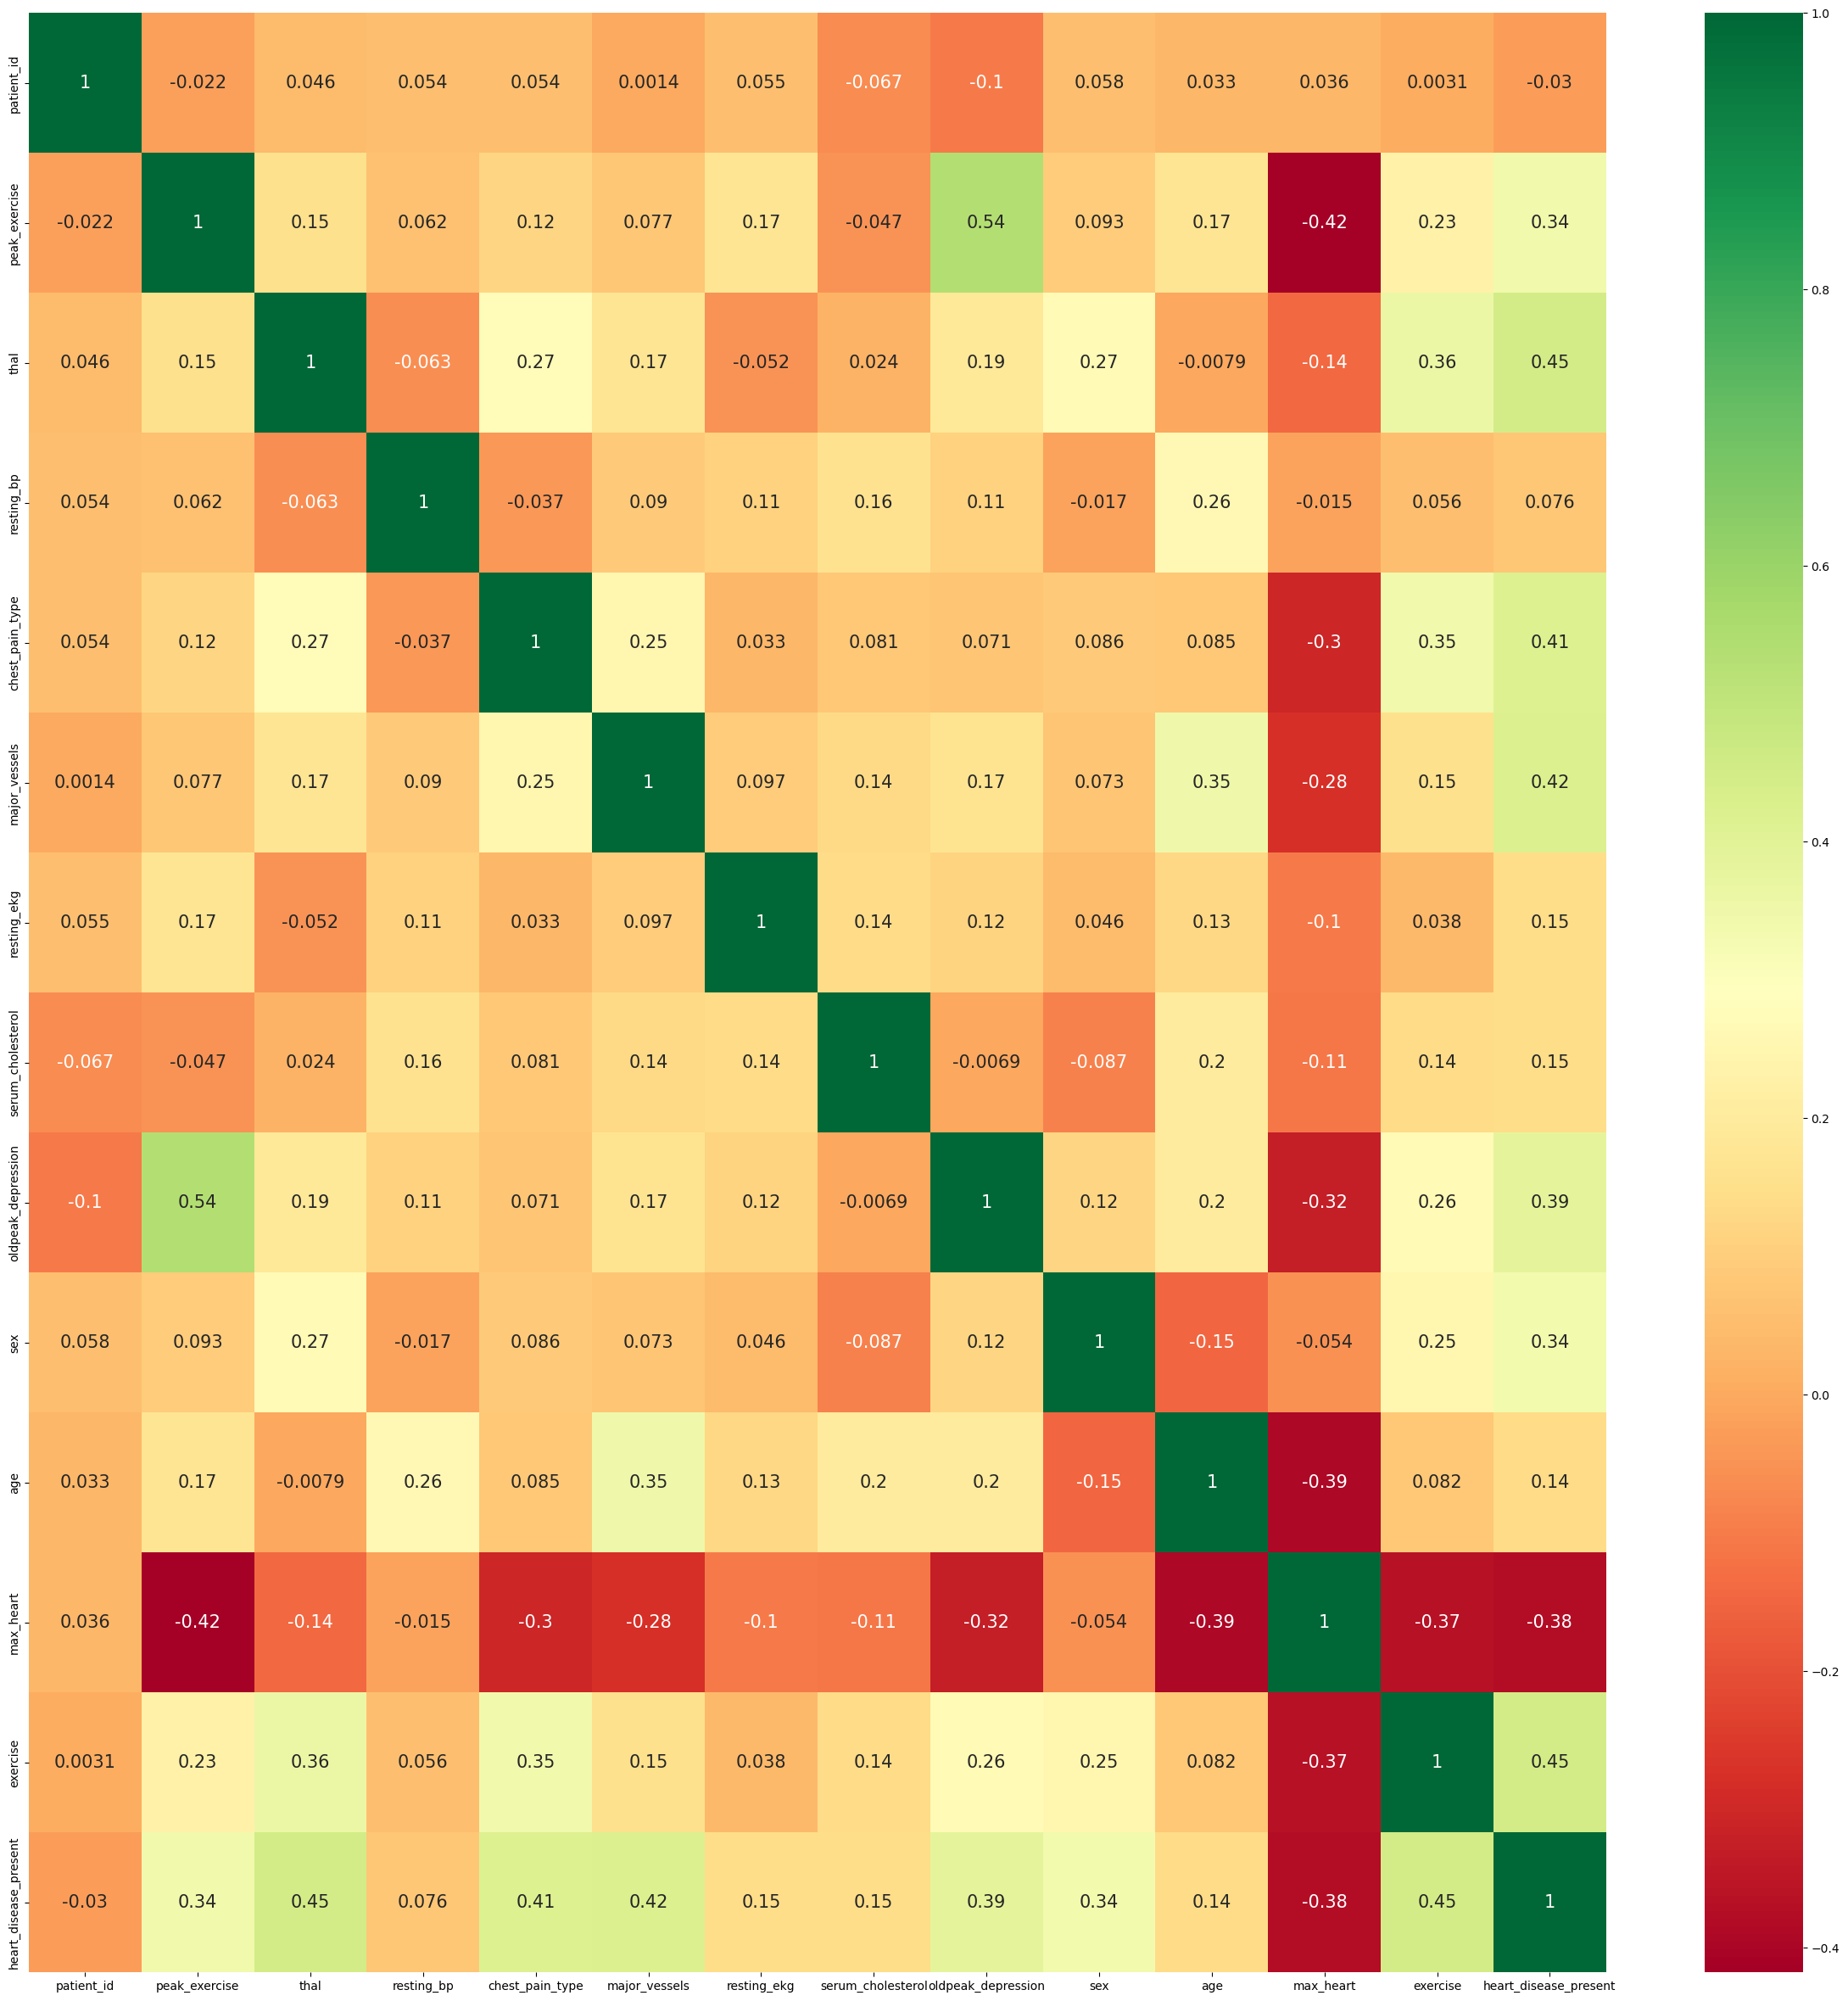

In [55]:
plt.figure(figsize=(30, 30))
sns.heatmap(df3.drop('fasting_bs', axis = 1).corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

#A heatmap is commonly used in machine learning to visualize the relationship between variables, particularly when analyzing the
#correlation between features.

## Model Training

In [56]:
x=df3.drop(['heart_disease_present','patient_id'], axis=1)
x

,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise
0,1,1,0.447368,2,0,0,2,0.777778,0.0,1,0.333333,0.698113,0
1,2,1,0.210526,3,0,0,0,0.376068,1.6,0,0.520833,0.584906,0
2,1,1,0.407895,4,3,0,2,0.760684,0.0,1,1.000000,0.622642,1
3,1,2,0.763158,4,0,0,0,0.414530,0.0,1,0.229167,0.801887,0
4,3,2,0.473684,1,0,0,2,0.615385,0.8,1,0.625000,0.462264,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,0.407895,4,2,1,0,0.547009,0.2,1,0.791667,0.632075,0
176,2,1,0.473684,4,0,0,1,0.858974,3.4,0,0.541667,0.198113,1
177,2,2,0.407895,3,0,0,0,0.782051,1.8,1,0.729167,0.330189,1
178,1,1,0.394737,3,2,1,0,0.551282,0.0,1,0.395833,0.745283,0


In [57]:
y=df3.heart_disease_present
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split    
# importing the train_test_split to split the data into training and testing

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42) 
# training data is 75% and 25% data is for testing 

In [60]:
x_train  

,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise
132,1,1,0.473684,2,0,0,2,0.333333,1.4,0,0.250000,0.716981,0
90,2,1,0.526316,2,0,0,0,0.619658,0.0,0,0.416667,0.622642,0
38,1,1,0.342105,2,1,0,2,0.611111,0.2,0,0.937500,0.235849,1
169,2,1,0.210526,1,0,0,2,0.363248,1.8,1,0.729167,0.452830,1
115,1,1,0.605263,3,0,1,2,0.363248,0.0,1,0.604167,0.650943,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,0.236842,4,0,0,0,0.333333,0.1,1,0.375000,0.443396,0
106,1,2,0.736842,3,0,0,2,0.452991,1.6,1,0.520833,0.650943,0
14,2,2,0.342105,1,0,0,0,0.448718,3.8,1,0.187500,0.811321,1
92,1,1,0.539474,3,0,1,0,0.760684,0.0,0,0.520833,0.698113,0


In [61]:
y_train

132    0
90     0
38     0
169    0
115    0
      ..
71     0
106    0
14     1
92     0
102    1
Name: heart_disease_present, Length: 135, dtype: int64

## Balancing the data
Balancing is important in machine learning because it addresses issues related to class imbalance in datasets, where one class significantly outnumbers the other(s). This imbalance can lead to biased models that perform well on the majority class but poorly on the minority class.

In [62]:
y_train.value_counts()  # as the data is balanced , no need to balance the data

heart_disease_present
0    81
1    54
Name: count, dtype: int64

## Applying Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression(random_state=42)

# initializes a logistic regression model from Scikit-learn.

In [64]:
Log.fit(x_train,y_train)  # fitting trainig data

LogisticRegression(random_state=42)

In [65]:
y_predict_Log= Log.predict(x_test)
y_predict_Log    # predicting for x_test

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [66]:
y_test.values

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

## Model Evaluation for Logistic Regression

In [67]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , classification_report , roc_auc_score

In [68]:
accuracy=accuracy_score(y_test,y_predict_Log)
print("Accuracy_Score :",accuracy)

Accuracy_Score : 0.8222222222222222


In [69]:
 precision_score(y_test,y_predict_Log)    

0.95

In [70]:
recall_score(y_test,y_predict_Log)                                    

0.7307692307692307

In [71]:
f1_score(y_test,y_predict_Log)  

0.8260869565217391

In [72]:
confusion_matrix(y_test,y_predict_Log)

array([[18,  1],
       [ 7, 19]], dtype=int64)

In [73]:
print(classification_report(y_test,y_predict_Log))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.95      0.73      0.83        26

    accuracy                           0.82        45
   macro avg       0.83      0.84      0.82        45
weighted avg       0.85      0.82      0.82        45



In [74]:
roc_auc_score(y_test,y_predict_Log)

0.8390688259109313

## Hyperparameter tuning for Logistic Regression


In [ ]:
from sklearn.model_selection import GridSearchCV

# Imports the GridSearchCV class, which performs an exhaustive search over a specified parameter grid to find the optimal hyperparameters 

In [ ]:
param_gride = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]


In [ ]:
gride=GridSearchCV(LogisticRegression(random_state=42), param_gride ,scoring='f1', verbose=3, cv=2 )
gride
# Initializes a grid search to find the best hyperparameters for a logistic regression model 

GridSearchCV(cv=2, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='f1', verbose=3)

In [ ]:
gride.fit(x_train,y_train)

Fitting 2 folds for each of 1600 candidates, totalling 3200 fits
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=saga;, score=0.000 total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=saga;, score=0.000 total 

GridSearchCV(cv=2, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='f1', verbose=3)

In [ ]:
gride.best_params_
#  retrieves the best hyperparameters found by the grid search for the logistic regression model.


{'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
gride.best_estimator_
# returns the logistic regression model with the best hyperparameters found by the grid search

LogisticRegression(C=1.623776739188721, random_state=42)

In [ ]:
clf_Log=LogisticRegression(C=1.623776739188721, max_iter=5000, random_state=42,
                   solver='sag')
# initializes a logistic regression model with a specific regularization strength, maximum iterations, random state for 
# reproducibility, and the 'sag' solver

In [ ]:
clf_Log.fit(x_train,y_train)   # fitting the model

LogisticRegression(C=1.623776739188721, max_iter=5000, random_state=42,
                   solver='sag')

In [ ]:
y_hyp_Log=clf_Log.predict(x_test)
y_hyp_Log

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [ ]:
accuracy_score(y_test,y_hyp_Log)

0.8222222222222222

In [ ]:
precision_score(y_test,y_hyp_Log)

0.95

In [ ]:
recall_score(y_test,y_hyp_Log)

0.7307692307692307

In [ ]:
f1_score(y_test,y_hyp_Log)

0.8260869565217391

In [ ]:
confusion_matrix(y_test,y_hyp_Log)

array([[18,  1],
       [ 7, 19]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_hyp_Log))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.95      0.73      0.83        26

    accuracy                           0.82        45
   macro avg       0.83      0.84      0.82        45
weighted avg       0.85      0.82      0.82        45



In [ ]:
roc_auc_score(y_test,y_hyp_Log)

0.8390688259109313

## Applying KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
# initializes a k-nearest neighbors classifier with default parameters.

In [76]:
Error=[]
for i in range (1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predict1=knn.predict(x_test)
    error=(y_test != y_predict1).sum()/len(y_test)*100
    Error.append(error)

# The code snippet calculates and appends the classification error percentage for a k-nearest neighbors model
# with varying n_neighbors values from 1 to 9, storing the results in the Error list.

In [77]:
Error

[20.0,
 24.444444444444443,
 20.0,
 22.22222222222222,
 17.77777777777778,
 22.22222222222222,
 15.555555555555555,
 20.0,
 17.77777777777778,
 22.22222222222222]

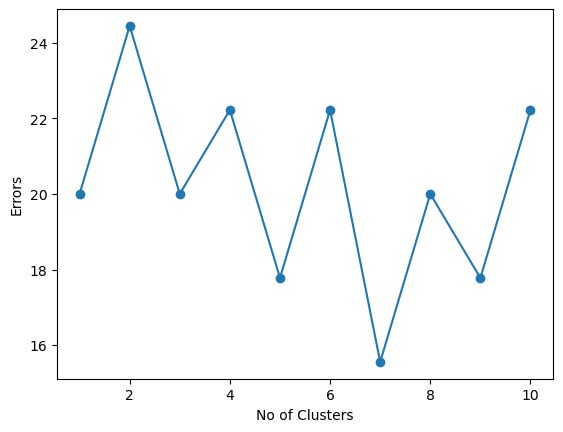

In [78]:
plt.plot(range(1,11),Error, marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Errors')
plt.show()

#  plots the classification errors against the number of neighbors, with markers at each data point, and 
# labels the x-axis as 'No of Clusters' and the y-axis as 'Errors' before displaying the plot.

In [79]:
KNN=KNeighborsClassifier(n_neighbors=7)
#  initializes a k-nearest neighbors classifier with 7 neighbors.

In [80]:
KNN.fit(x_train,y_train)  # fitting the data

KNeighborsClassifier(n_neighbors=7)

In [81]:
y_predict_KNN=KNN.predict(x_test)
y_predict_KNN

# predict the values for x_test

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [82]:
y_test.values

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

## Model Evaluation for KNN

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [84]:
accuracy_score(y_test,y_predict_KNN)

0.8444444444444444

In [85]:
precision_score(y_test,y_predict_KNN)

1.0

In [86]:
recall_score(y_test,y_predict_KNN)

0.7307692307692307

In [87]:
f1_score(y_test,y_predict_KNN)

0.8444444444444444

In [88]:
confusion_matrix(y_test,y_predict_KNN)

array([[19,  0],
       [ 7, 19]], dtype=int64)

In [89]:
print(classification_report(y_test,y_predict_KNN))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.73      0.84        26

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.89      0.84      0.84        45



## Hyperparameter tuning for KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [7],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

#grid_params dictionary specifies a grid of hyperparameters for tuning a k-nearest neighbors classifier, 
#including n_neighbors, weights, and metric options

In [ ]:
gride_knn=GridSearchCV(KNeighborsClassifier(), grid_params ,scoring='f1', verbose=3, cv=4 )
gride_knn

# initializes a grid search to optimize k-nearest neighbors hyperparameters using the specified parameter grid,
# aiming to maximize the F1 score with 4-fold cross-validation and detailed logging

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [7],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [ ]:
 gride_knn.fit(x_train,y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/4] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/4] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.720 total time=   0.0s
[CV 4/4] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.727 total time=   0.0s
[CV 1/4] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.880 total time=   0.0s
[CV 2/4] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.846 total time=   0.0s
[CV 3/4] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.720 total time=   0.0s
[CV 4/4] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.783 total time=   0.0s
[CV 1/4] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/4] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.800 total

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [7],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [ ]:
gride_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [ ]:
gride_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [ ]:
hyp=KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [ ]:
hyp.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [ ]:
y_hyp_predict=hyp.predict(x_test)
y_hyp_predict

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [ ]:
accuracy_score(y_test,y_hyp_predict)

0.8222222222222222

In [ ]:
precision_score(y_test,y_hyp_predict)

1.0

In [ ]:
recall_score(y_test,y_hyp_predict)

0.6923076923076923

In [ ]:
f1_score(y_test,y_hyp_predict)

0.8181818181818182

In [ ]:
confusion_matrix(y_test,y_hyp_predict)


array([[19,  0],
       [ 8, 18]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_hyp_predict))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       1.00      0.69      0.82        26

    accuracy                           0.82        45
   macro avg       0.85      0.85      0.82        45
weighted avg       0.87      0.82      0.82        45



## Applying SVM

In [90]:
from sklearn.svm import SVC
SV=SVC()
#initializes a support vector classifier with default parameters.

In [91]:
SV.fit(x_train,y_train)   # Fitting the training data

SVC()

In [92]:
y_predict_SV=SV.predict(x_test)
y_predict_SV   
# predicting the x_test

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

## Model Evaluation for SVM

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [94]:
accuracy_score(y_test,y_predict_SV)

0.8222222222222222

In [95]:
precision_score(y_test,y_predict_SV)

1.0

In [96]:
recall_score(y_test,y_predict_SV)

0.6923076923076923

In [97]:
f1_score(y_test,y_predict_SV)

0.8181818181818182

In [98]:
roc_auc_score(y_test,y_predict_SV)

0.8461538461538461

In [99]:
print(classification_report(y_test,y_predict_SV))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       1.00      0.69      0.82        26

    accuracy                           0.82        45
   macro avg       0.85      0.85      0.82        45
weighted avg       0.87      0.82      0.82        45



## Hyperparameter tuning for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_SV = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
# defines a grid of hyperparameters for tuning a support vector classifier, specifying different values for the regularization
# parameter C and the kernel coefficient gamma.

In [ ]:
grid_SV = GridSearchCV(SV, param_grid_SV, scoring='f1', cv = 5, verbose = 3)
grid_SV
# initializes a grid search to find the best hyperparameters

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [ ]:
grid_SV.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.571 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.533 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.588 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.533 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [ ]:
grid_SV.best_params_  
# retrieves the best hyperparameters found by the grid search for the support vector classifier.

{'C': 1000, 'gamma': 0.001}

In [ ]:
grid_SV.best_estimator_
# returns the support vector classifier with the best hyperparameters found by the grid search.


SVC(C=1000, gamma=0.001)

In [ ]:
clf_SV=SVC(C=1000, gamma=0.0001)
#  initializes a support vector classifier with a regularization parameter C of 1000 and a kernel coefficient gamma of 0.0001.

In [ ]:
clf_SV.fit(x_train,y_train)

SVC(C=1000, gamma=0.0001)

In [ ]:
y_hyp_SV=clf_SV.predict(x_test)
y_hyp_SV

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [ ]:
accuracy_score(y_test,y_hyp_SV)

0.8

In [ ]:
precision_score(y_test,y_hyp_SV)

1.0

In [ ]:
recall_score(y_test,y_hyp_SV)

0.6538461538461539

In [ ]:
confusion_matrix(y_test,y_hyp_SV)

array([[19,  0],
       [ 9, 17]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_hyp_SV))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        19
           1       1.00      0.65      0.79        26

    accuracy                           0.80        45
   macro avg       0.84      0.83      0.80        45
weighted avg       0.86      0.80      0.80        45



In [ ]:
roc_auc_score(y_test,y_hyp_SV)


0.8269230769230769

## Applying Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier(random_state=42)#object creation for decision tree 

In [101]:
dt.fit(x_train,y_train)#training the model

DecisionTreeClassifier(random_state=42)

In [102]:
y_hat=dt.predict(x_test)#prediction
y_hat

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [104]:
accuracy_score(y_test,y_hat)

0.8222222222222222

In [105]:
f1_score(y_test,y_hat)

0.8260869565217391

In [106]:
recall_score(y_test,y_hat)

0.7307692307692307

In [107]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.95      0.73      0.83        26

    accuracy                           0.82        45
   macro avg       0.83      0.84      0.82        45
weighted avg       0.85      0.82      0.82        45



## Applying for Random Forest


In [108]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)


In [109]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [110]:
yp_test=RF.predict(x_test)
yp_test

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [111]:
yp_train=RF.predict(x_train)
yp_train 

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

## Model Evaluation

In [112]:
from sklearn.metrics import accuracy_score , precision_score ,f1_score , recall_score, classification_report


In [113]:
accuracy_score(y_test,yp_test)

0.8444444444444444

In [114]:
f1_score(y_test,yp_test)

0.851063829787234

In [115]:
print(classification_report(y_test,yp_test))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.95      0.77      0.85        26

    accuracy                           0.84        45
   macro avg       0.85      0.86      0.84        45
weighted avg       0.87      0.84      0.85        45



## Applying for Navie Bayes

In [116]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()

In [117]:
NB.fit(x_train,y_train)

MultinomialNB()

In [118]:
y_predict_NB=NB.predict(x_test)
y_predict_NB

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

## Model Evaluation for Navie Bayes

In [119]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , classification_report

In [120]:
accuracy_score(y_test,y_predict_NB)

0.6666666666666666

In [121]:
precision_score(y_test,y_predict_NB)

0.9230769230769231

In [122]:
recall_score(y_test,y_predict_NB)

0.46153846153846156

In [123]:
f1_score(y_test,y_predict_NB)

0.6153846153846154

In [124]:
print(classification_report(y_test,y_predict_NB))

              precision    recall  f1-score   support

           0       0.56      0.95      0.71        19
           1       0.92      0.46      0.62        26

    accuracy                           0.67        45
   macro avg       0.74      0.70      0.66        45
weighted avg       0.77      0.67      0.65        45



## Gradient Boosting

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
GBM=GradientBoostingClassifier(random_state=42)

In [126]:
GBM.fit(x_train,y_train) 

GradientBoostingClassifier(random_state=42)

In [127]:
y_gbm=GBM.predict(x_test)
y_gbm

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

## Model Evaluation For Gradient Boosting

In [128]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,classification_report

In [129]:
accuracy_score(y_test,y_gbm)

0.8222222222222222

In [130]:
precision_score(y_test,y_gbm)

0.9090909090909091

In [131]:
recall_score(y_test,y_gbm)

0.7692307692307693

In [132]:
f1_score(y_test,y_gbm)

0.8333333333333334

In [133]:
print(classification_report(y_test,y_gbm))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.91      0.77      0.83        26

    accuracy                           0.82        45
   macro avg       0.82      0.83      0.82        45
weighted avg       0.84      0.82      0.82        45



## Applyig for ANN


In [134]:
## Scaling the data as the magnitude of variables are varying lot
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
scaled_x=sc.fit_transform(x) ## transforming the data

In [135]:
x = pd.DataFrame(scaled_x, columns=x.columns) ##converting the arrays
## to dataframe

In [136]:
x

,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise
0,-0.891241,-0.647059,-0.117432,-1.234775,-0.718403,-0.438238,0.953850,1.358696,-0.985690,0.672022,-1.053964,0.932485,-0.680746
1,0.729197,-0.647059,-1.352755,-0.166220,-0.718403,-0.438238,-1.054255,-0.717635,0.736875,-1.488048,-0.087134,0.387084,-0.680746
2,-0.891241,-0.647059,-0.323319,0.902335,2.385097,-0.438238,0.953850,1.270341,-0.985690,0.672022,2.383654,0.568884,1.468977
3,-0.891241,1.117647,1.529666,0.902335,-0.718403,-0.438238,-1.054255,-0.518837,-0.985690,0.672022,-1.591092,1.432436,-0.680746
4,2.349636,1.117647,0.019826,-2.303330,-0.718403,-0.438238,0.953850,0.519328,-0.124407,0.672022,0.449994,-0.203768,-0.680746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.729197,1.117647,-0.323319,0.902335,1.350597,2.281863,-1.054255,0.165910,-0.770369,0.672022,1.309398,0.614334,-0.680746
176,0.729197,-0.647059,0.019826,0.902335,-0.718403,-0.438238,-0.050203,1.778380,2.674760,-1.488048,0.020291,-1.476372,1.468977
177,0.729197,1.117647,-0.323319,-0.166220,-0.718403,-0.438238,-1.054255,1.380785,0.952195,0.672022,0.987122,-0.840070,1.468977
178,-0.891241,-0.647059,-0.391948,-0.166220,1.350597,2.281863,-1.054255,0.187999,-0.985690,0.672022,-0.731688,1.159736,-0.680746


In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                test_size=0.2,random_state=10)
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.01,
                       max_iter=200,
                       random_state=42) ## model object creation max_iter=Stopping parameter
model.fit(x_train,y_train) ## training the data

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.01,
              random_state=42)

In [138]:
y_predict_proba = model.predict_proba(x_test) ## predicting the probability of class
y_predict_proba

array([[4.94061953e-01, 5.05938047e-01],
       [9.64896408e-01, 3.51035919e-02],
       [9.99999692e-01, 3.08264867e-07],
       [2.27857912e-01, 7.72142088e-01],
       [9.99988662e-01, 1.13383240e-05],
       [9.99883468e-01, 1.16531620e-04],
       [9.79596653e-01, 2.04033465e-02],
       [8.62844974e-03, 9.91371550e-01],
       [9.99995850e-01, 4.14950713e-06],
       [6.61547668e-02, 9.33845233e-01],
       [1.00000000e+00, 3.65038953e-10],
       [9.99990841e-01, 9.15860432e-06],
       [4.42815562e-10, 1.00000000e+00],
       [8.50058833e-01, 1.49941167e-01],
       [4.44342697e-01, 5.55657303e-01],
       [9.37279845e-01, 6.27201548e-02],
       [9.99934665e-01, 6.53352702e-05],
       [9.98518348e-01, 1.48165180e-03],
       [9.99991312e-01, 8.68845095e-06],
       [9.99979553e-01, 2.04471234e-05],
       [1.00000000e+00, 5.87601353e-12],
       [9.99816242e-01, 1.83757783e-04],
       [1.35780276e-11, 1.00000000e+00],
       [9.99992816e-01, 7.18395857e-06],
       [6.247574

In [139]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [140]:
from sklearn.metrics import f1_score ,recall_score , accuracy_score ,classification_report


In [141]:
f1_score(y_test,y_predict)

0.6666666666666666

In [142]:
recall_score(y_test,y_predict)

0.6428571428571429

In [143]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.69      0.64      0.67        14

    accuracy                           0.75        36
   macro avg       0.74      0.73      0.73        36
weighted avg       0.75      0.75      0.75        36

